In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/index.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')


In [4]:
# Mostrar as primeiras linhas do dataframe
print(df.head())

# Resumo estatístico dos dados numéricos
print(df.describe())

# Verificar os tipos de dados
print(df.info())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
             money
count  1208.000000
mean     32.828460
std       5.107246
min      18.120000
25%      27.920000
50%      32.820000
75%      37.720000
max      40.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1208 non-null   object 
 1

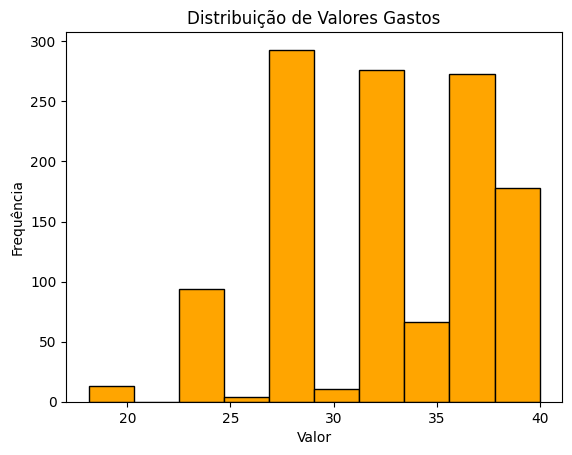

In [7]:
plt.hist(df['money'], bins=10, color='orange', edgecolor='black')
plt.title('Distribuição de Valores Gastos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()


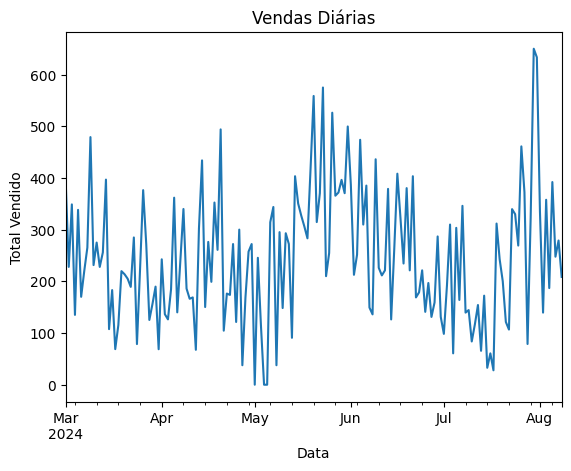

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date').resample('D').sum()['money'].plot()
plt.title('Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Total Vendido')
plt.show()


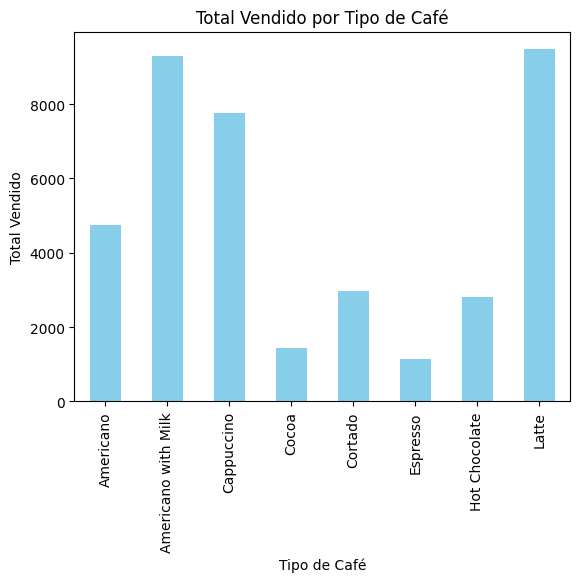

In [9]:
df.groupby('coffee_name')['money'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Vendido por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Total Vendido')
plt.show()


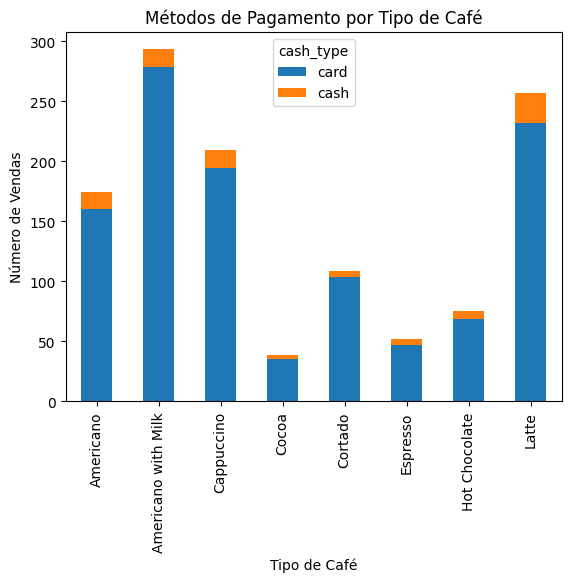

In [10]:
df.groupby(['coffee_name', 'cash_type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Métodos de Pagamento por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Número de Vendas')
plt.show()


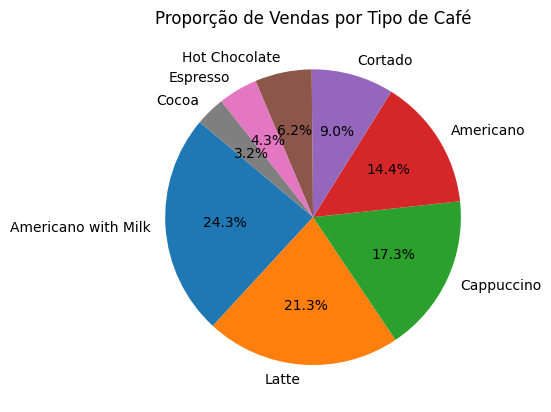

In [14]:
df['coffee_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Vendas por Tipo de Café')
plt.ylabel('')
plt.show()


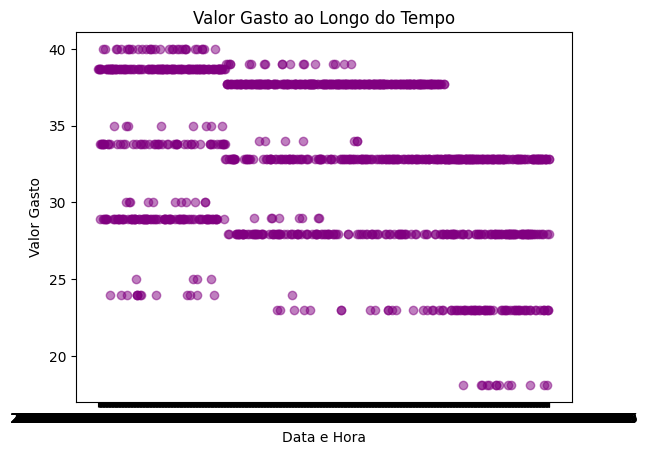

In [12]:
plt.scatter(df['datetime'], df['money'], alpha=0.5, color='purple')
plt.title('Valor Gasto ao Longo do Tempo')
plt.xlabel('Data e Hora')
plt.ylabel('Valor Gasto')
plt.show()


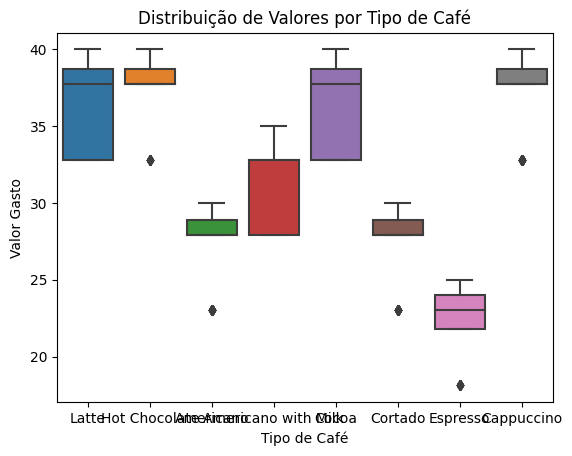

In [13]:
sns.boxplot(x='coffee_name', y='money', data=df)
plt.title('Distribuição de Valores por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Valor Gasto')
plt.show()


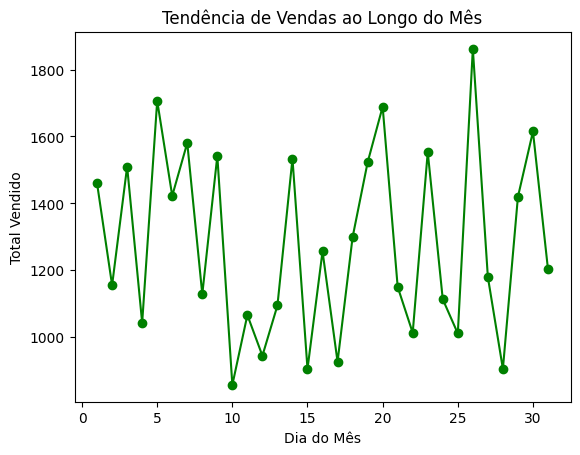

In [15]:
df['date'] = pd.to_datetime(df['date'])
df.groupby(df['date'].dt.day)['money'].sum().plot(kind='line', marker='o', color='green')
plt.title('Tendência de Vendas ao Longo do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Total Vendido')
plt.show()


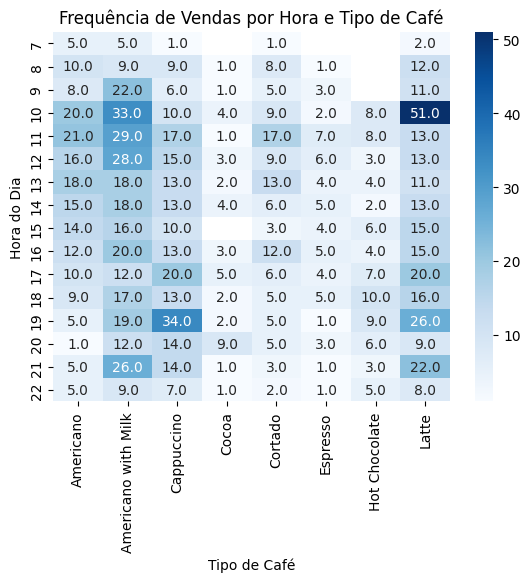

In [18]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
heatmap_data = df.groupby(['hour', 'coffee_name']).size().unstack()
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".1f")  # Altere o formato para .1f
plt.title('Frequência de Vendas por Hora e Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Hora do Dia')
plt.show()



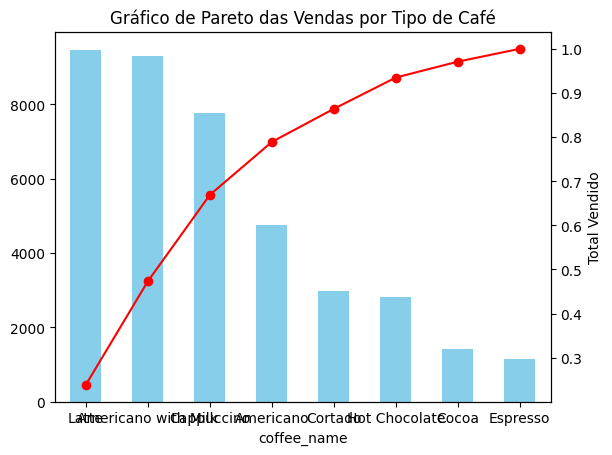

In [17]:
sales_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sales_by_coffee.plot(kind='bar', color='skyblue')
cumulative = sales_by_coffee.cumsum() / sales_by_coffee.sum()
cumulative.plot(marker='o', color='red', secondary_y=True)
plt.title('Gráfico de Pareto das Vendas por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Total Vendido')
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np


In [18]:
# Pré-processamento dos dados
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

In [19]:
# Tratamento de valores nulos (por exemplo, removendo ou preenchendo valores nulos)
df = df.dropna()

In [20]:
# Codificação de variáveis categóricas
encoder = OneHotEncoder()
encoded_coffee = encoder.fit_transform(df[['coffee_name']]).toarray()


In [21]:
# Criação do dataframe com as features
X = np.concatenate([encoded_coffee, df[['hour']]], axis=1)
y = df['money']


In [22]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [26]:
# Previsão com o modelo
y_pred = model.predict(X_test)



In [29]:
# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')

Erro Quadrático Médio (MSE): 4.62908350136576
Coeficiente de Determinação (R²): 0.8026037029878101
